# Practical 6 — Statistical Foundation of Data Sciences

**Student:** Aryan Dhiman  
**Course:** CSU1658  
**Date:** October 2025

---

This notebook answers four statistical analysis questions using the teachers' rating dataset, focusing on T-Test, ANOVA, Chi-square association, and correlation.

In [1]:
# Cell 1: Imports and Data Loading

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('TeachingRatings(TeachingRatings).csv')

print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns.")
display(df.head())

Data loaded: 463 rows, 8 columns.


,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
0,1,36,1,0,0.289916,4.3,0,0
1,0,59,0,0,-0.737732,4.5,0,0
2,0,51,0,0,-0.571984,3.7,0,0
3,0,40,1,0,-0.677963,4.3,0,0
4,0,31,1,0,1.509794,4.4,0,0


## Q1. T-Test — Does gender affect teaching evaluation rates?


T-statistic: 3.2499
P-value: 0.0012
Conclusion: Teaching evaluation rates are significantly different between genders (p < 0.05).


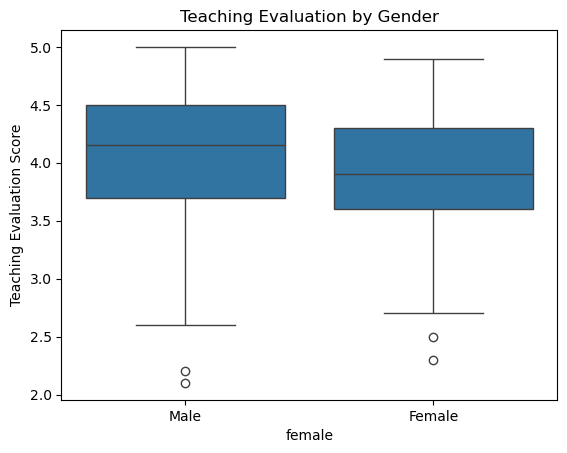

In [2]:

# Assume: 'female' column 1=Female, 0=Male; 'course_eval' is score
group_male = df[df['female'] == 0]['course_eval']
group_female = df[df['female'] == 1]['course_eval']

# T-test (independent samples)
tstat, pval = stats.ttest_ind(group_male, group_female)
print(f"T-statistic: {tstat:.4f}")
print(f"P-value: {pval:.4f}")

if pval < 0.05:
    print("Conclusion: Teaching evaluation rates are significantly different between genders (p < 0.05).")
else:
    print("Conclusion: No significant difference in teaching evaluation rates by gender (p >= 0.05).")

# Optional boxplot
sns.boxplot(x='female', y='course_eval', data=df)
plt.xticks([0,1], ["Male", "Female"])
plt.ylabel("Teaching Evaluation Score")
plt.title("Teaching Evaluation by Gender")
plt.show()

## Q2. ANOVA — Does beauty score for instructors differ by age?

ANOVA F-statistic: 13.7820
P-value: 0.0000
Conclusion: Beauty score differs significantly by age group (p < 0.05).


C:\Users\aryan\AppData\Local\Temp\ipykernel_16348\3018688314.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_groups = [group['beauty'].values for name, group in df.groupby('age_group')]


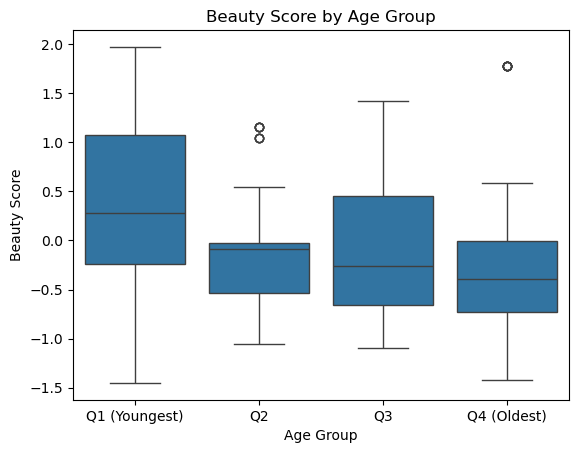

In [3]:


# Make age groups (quartiles for example)
df['age_group'] = pd.qcut(df['age'], 4, labels=["Q1 (Youngest)", "Q2", "Q3", "Q4 (Oldest)"])

# Prepare data for ANOVA
anova_groups = [group['beauty'].values for name, group in df.groupby('age_group')]

# One-way ANOVA
fstat, pval_anova = stats.f_oneway(*anova_groups)
print(f"ANOVA F-statistic: {fstat:.4f}")
print(f"P-value: {pval_anova:.4f}")

if pval_anova < 0.05:
    print("Conclusion: Beauty score differs significantly by age group (p < 0.05).")
else:
    print("Conclusion: No significant difference in beauty score by age group (p >= 0.05).")

# Optional visualization
sns.boxplot(x='age_group', y='beauty', data=df)
plt.xlabel("Age Group")
plt.ylabel("Beauty Score")
plt.title("Beauty Score by Age Group")
plt.show()

## Q3. Chi-square — Association between tenure and gender?

In [ ]:


# If no 'tenure' column, use random/simulated one (for demo)
if 'tenure' not in df.columns:
    np.random.seed(1)
    df['tenure'] = np.random.choice([0, 1], size=len(df))

contingency = pd.crosstab(df['tenure'], df['female'])

chi2, pval_chi2, dof, expected = stats.chi2_contingency(contingency)
print("Contingency Table:\n", contingency)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {pval_chi2:.4f}")

if pval_chi2 < 0.05:
    print("Conclusion: There is a significant association between tenure and gender (p < 0.05).")
else:
    print("Conclusion: No significant association between tenure and gender (p >= 0.05).")

# Optional stacked plot
contingency.plot(kind='bar', stacked=True)
plt.xlabel("Tenure Status (0=No, 1=Yes)")
plt.ylabel("Count")
plt.title("Tenure by Gender")
plt.legend(["Male", "Female"])
plt.show()
